In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score,balanced_accuracy_score
from sklearn.decomposition import FastICA

#### Load the left cingulate region for the hcp dataset

In [2]:
embeddings_HCP = pd.read_csv("/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Output/2024-05-17/17-33-50_137/HCP_epoch60_embeddings/full_embeddings.csv", index_col=0)
embeddings_HCP.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
100206,-24.917880,-10.673243,31.255718,-14.478464,8.360127,9.927284,2.550213,10.874438,7.411881,1.187276,...,11.120356,-1.787396,-7.730851,30.205887,-18.208553,-17.427822,-47.337750,-9.245305,-6.999600,4.180949
100307,12.314554,11.594121,13.307158,-31.369896,7.620007,19.986906,-3.377792,12.507202,-0.334976,0.692380,...,7.435789,-26.681438,24.532467,32.085450,-12.200564,-44.108162,-38.481830,-4.778722,-6.047495,3.458181
100408,20.813276,3.623191,38.722008,-23.177960,16.610842,3.435390,10.889226,-2.223411,-8.859007,7.737382,...,-39.144306,-37.228294,-3.418950,24.074074,-7.853890,1.814369,-19.583284,3.847825,0.174430,21.382510
100610,23.105474,-13.484158,3.034245,-36.565360,-2.356708,4.431172,25.246935,7.577326,-31.271326,18.277721,...,-21.295162,-9.036210,18.312103,11.303175,-12.831594,5.909308,-4.327903,-5.094877,-1.655752,7.903294
101006,-4.921755,7.155756,26.192656,-3.164310,1.616181,-8.191695,-30.146220,-2.800916,13.598273,-6.912625,...,-23.606762,-12.804541,-27.089450,5.510329,28.811680,-12.628745,-12.914171,-12.730132,-5.261444,-1.529659


#### Load the left cingulate region for the ukb dataset

In [3]:
embeddings_UKB = pd.read_csv("/neurospin/dico/adufournet/Runs/02_Heritability_Left_PCS_HCP/Output/2024-05-17/17-33-50_137/UKB_epoch60_embeddings/full_embeddings.csv", index_col=0)
embeddings_UKB.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,4.984328,5.862696,35.545628,21.530850,-15.400157,4.803300,-3.270256,17.673480,5.964229,10.379309,...,-5.588728,1.781751,-6.887294,4.123653,-3.004085,24.731771,5.531009,-5.475274,-2.560727,0.488364
sub-1000458,9.681720,-17.024338,-21.298676,-10.950365,22.326513,-8.129682,-18.481632,-4.854505,19.746336,-11.974570,...,-3.582124,-40.108284,7.882350,-8.344917,-11.103089,-21.647219,-2.470874,-20.251673,-7.385629,5.577127
sub-1000575,-4.692525,-26.790430,30.774847,-11.931572,11.357469,0.343410,6.613949,-11.375133,-20.105026,3.176765,...,4.907033,3.553167,25.210009,-7.363922,-9.255467,-2.145081,-12.499691,-5.062853,2.040080,-6.979667
sub-1000606,-7.469733,-1.329392,21.345432,0.904605,10.759202,-2.359774,-38.278050,-3.586395,13.992952,-6.504960,...,-6.491087,-10.040780,3.959444,-7.020837,22.448591,-41.282510,-9.342698,7.340107,-12.833817,-6.211372
sub-1000963,-21.217674,-1.909686,-5.333684,10.033036,-7.345963,-9.958603,-5.830301,-1.839255,22.282500,-18.502360,...,-1.436800,-49.797806,-12.431572,-9.649385,-5.362879,3.641441,-5.760827,-3.505362,-7.708777,-5.034035


#### Scale the data on ukb

In [4]:
scaler = StandardScaler()
scaler.fit(embeddings_UKB)

scl_bdd_hcp = scaler.transform(embeddings_HCP)
scl_bdd_ukb = scaler.transform(embeddings_UKB)
scl_bdd_hcp.shape ,scl_bdd_ukb.shape

((1114, 256), (21051, 256))

#### ICA (fast algorithm for Independent Component Analysis) fit on UKB

In [5]:
max_iter = 1000
ICA_UKB_fit = FastICA(max_iter=max_iter)
ICA_UKB_fit.fit(scl_bdd_ukb)
ICA_ukb = ICA_UKB_fit.transform(scl_bdd_ukb)
ICA_hcp = ICA_UKB_fit.transform(scl_bdd_hcp)


In [6]:
ICA_hcp.shape

(1114, 256)

(array([  2.,   1.,  18.,  62., 107.,  51.,  11.,   0.,   3.,   1.]),
 array([-0.02580393, -0.01984127, -0.01387862, -0.00791596, -0.0019533 ,
         0.00400936,  0.00997202,  0.01593468,  0.02189734,  0.02786   ,
         0.03382266]),
 <BarContainer object of 10 artists>)

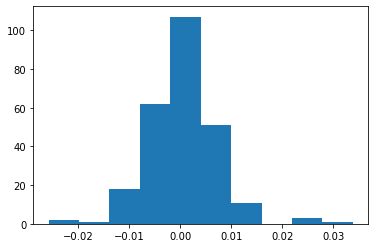

In [7]:
plt.hist(ICA_hcp[1,:])

#### ICA (fast algorithm for Independent Component Analysis) fit on HCP

In [9]:
ICA_HCP_fit = FastICA()
ICA_HCP_fit.fit(scl_bdd_hcp)
ICA_hcp = ICA_HCP_fit.transform(scl_bdd_hcp)